<a href="https://colab.research.google.com/github/chandusayhi/NETFLIX_MOVIES_AND_TV_SHOWS/blob/main/Chandrakant_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Netflix Data Analysis & Visualization</b>

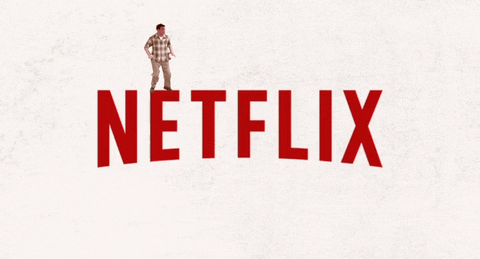

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

<h1><b>Importing the required libraries or packages for EDA


In [ ]:
# Import basic modules
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra


'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot # Required to use plotly offline in jupyter notebook


import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

img_fmt = 'svg'



In [ ]:
pip install chart_studio

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
import chart_studio.plotly as py

# these two lines are what allow your code to show up in a notebook
import plotly.io as pio
pio.renderers.default='colab'

<h1><b>INTRODUCTION</b>

What is Netflix? 

Netflix is a streaming service that allows our members to watch a wide variety of award-winning TV shows, movies, documentaries, and more on thousands of internet-connected devices. With Netflix, you can enjoy unlimited ad-free viewing of our content. There's always something new to discover, and more TV shows and movies are added every month!

TV Shows & Movies In over 190 countries, Netflix members get instant access to great content. Netflix has an extensive global content library featuring award-winning Netflix originals, feature films, documentaries, TV shows, and more. Netflix content will vary by region, and may change over time. The more you watch, the better Netflix gets at recommending TV shows and movies you’ll love.You can play, pause, and resume watching without ads or commitments.Plus, you can download your favorite shows to your iOS or Android mobile device, or Windows 10 app. With downloads, you can watch while you're on the go and without an internet connection. Go ahead, binge a little!

Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals.

As of December 31, 2021, Netflix had over 221.8 million subscribers worldwide, including 75.2 million in the United States and Canada, 74.0 million in Europe, the Middle East and Africa, 39.9 million in Latin America and 32.7 million in Asia-Pacific. It is available worldwide aside from Mainland China (due to local restrictions), Iran, Syria, North Korea and Crimea (due to US sanctions). Netflix has played a prominent role in independent film distribution, and is a member of the Motion Picture Association (MPA).

Netflix can be accessed via internet browser on computers, or via application software installed on smart TVs, set-top boxes connected to televisions, tablet computers, smartphones, digital media players, Blu-ray Disc players, video game consoles and virtual reality headsets on the list of Netflix-compatible devices. It is available in 4K resolution. In the United States, the company provides DVD and Blu-ray rentals delivered individually via the United States Postal Service from regional warehouses.

Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business. In 2007, Netflix introduced streaming media and video on demand. The company expanded to Canada in 2010, followed by Latin America and the Caribbean. Netflix entered the content production industry in 2013, debuting its first series House of Cards. In January 2016, it expanded to an additional 130 countries and then operated in 190 countries.

The company is ranked 115th on the Fortune 500 and 219th on the Forbes Global 2000. It is the largest entertainment/media company by market capitalization. In 2021, Netflix was ranked as the eighth-most trusted brand globally by Morning Consult. During the 2010s, Netflix was the top-performing stock in the S&P 500 stock market index, with a total return of 3,693%.

Netflix is headquartered in Los Gatos, California, in Santa Clara County, with the two CEOs, Hastings and Ted Sarandos, split between Los Gatos and Los Angeles, respectively. It also operates international offices in Asia, Europe and Latin America including in Canada, France, Brazil, Netherlands, India, Japan, South Korea and the United Kingdom. The company has production hubs in Los Angeles, Albuquerque, London, Madrid, Vancouver and Toronto. Compared to other distributors, Netflix pays more for TV shows up front, but keeps more "upside" (i.e. future revenue opportunities from possible syndication, merchandising, etc.) on big hits.

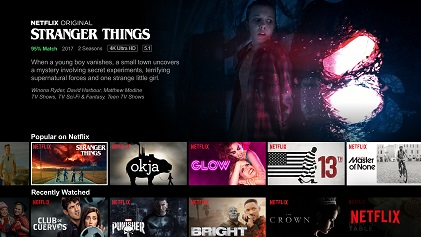

Streaming Devices Watch anywhere, anytime, on thousands of devices. Netflix streaming software allows you to instantly watch content from Netflix through any internet-connected device that offers the Netflix app, including smart TVs, game consoles, streaming media players, set-top boxes, smartphones, and tablets. View our Internet Speed Recommendations to achieve the best performance. You can also stream Netflix directly from your computer or laptop. We recommend reviewing the System Requirements for web browser compatibility.

<b>So lets dive into the netflix dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1><b>A high level overview of the Neflix Dataset Exploration and Visualization</b>

  - **Loading and inspecting the Dataset**
    - Checking Shape of the Dateset
    - Meaningful Column names
    - Validating Duplicate Records
    - Checking Missing values
    - Unique values (counts) for each Feature
    - Unique values (names) are checked for Features with a unique value count below 100
    - Data validation - like for rating feature value cannot be duration of the movie.
  - **Dataset Preparation**
    - DataType Validation
    - Dervied Columns
  - **Univariante Analysis**
    - Movies & TV shows - Distribution
    - A pattern for adding Movies & TV shows content annually, monthly, etc.
    - Release year of a movie or TV show
    - Identify how content is distributed based on maturity level - kids, teens, and adults
    - Netflix's most popular genre
    - Top 20 cast contributed to Netflix content
  - **Biivariante Analysis**
    - day content added and Type (Movie or Tv Show)
    - rating and type 
  - **Summary of final recommendations**

<h1><b>Loading and inspecting the Dataset</b>

### <b>Loading the csv file

In [ ]:
#load the data
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Unsupervised_ML_Clustering/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv')
data.head().style.background_gradient(cmap='mako_r')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,nan,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.


### <b>Checking Shape and Column names

In [ ]:
#Get the details of number of rows and columns
data.shape

(7787, 12)

In [ ]:
#Get the information about the columns names
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### <b>To make the column names more meaningful, "listed_in" has been changed to "genres".

In [ ]:
#Renaming the columns names
data.rename(columns = {"listed_in":"genres"},inplace= True)
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [ ]:
#Analysing the input dataframe
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


# <b>Exploratory Data Analysis

<h1><b>Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<b>Checking for missing values

In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

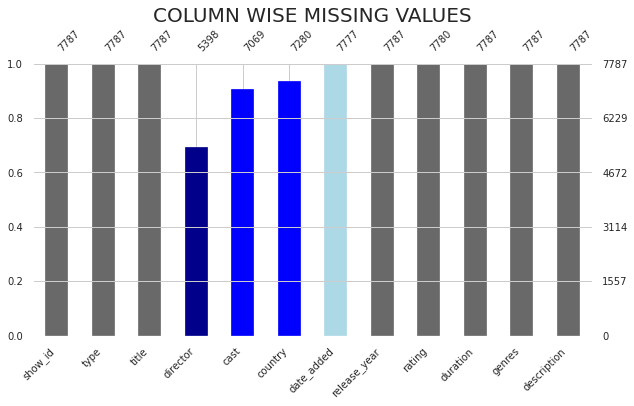

In [ ]:
# Plot missing values in columns
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(data,fontsize=10,color=color,figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

* There are missing values in column director,cast,country and date_added.
* We can't randomly fill the missing values in columns of director and cast, so we can drop them.
* For minimal number of missing values in country and date_added,rating, we can fill them using mode(most common value) and mean.

<b>Handling missing values

In [ ]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'] = data['rating'].fillna(data['country'].mode()[0])

In [ ]:
data = data.dropna( how='any',subset=['cast', 'director'])

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

All the missing values in the dataset have either been removed or filled. There are no missing values left.

In [ ]:
data.duplicated().sum()

0

dataset has 0 duplicated values.

 <b>Cleaning the data

In [ ]:
data['genres'] = data['genres'].apply(lambda x: x.split(",")[0])
data['genres'].head()

1                    Dramas
2             Horror Movies
3        Action & Adventure
4                    Dramas
5    International TV Shows
Name: genres, dtype: object

In [ ]:
data['year_add'] = data['date_added'].apply(lambda x: x.split(" ")[-1])
data['year_add'].head()

1    2016
2    2018
3    2017
4    2020
5    2017
Name: year_add, dtype: object

In [ ]:
data['month_add'] = data['date_added'].apply(lambda x: x.split(" ")[0])
data['month_add'].head()

1    December
2    December
3    November
4     January
5        July
Name: month_add, dtype: object

In [ ]:
data['country_main'] = data['country'].apply(lambda x: x.split(",")[0])
data['country_main'].head()

1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
Name: country_main, dtype: object

In [73]:
data['type'].value_counts()

Movie      4834
TV Show     145
Name: type, dtype: int64

In [74]:
data['rating'].value_counts()

TV-MA            1724
TV-14            1183
R                 656
TV-PG             426
PG-13             378
PG                241
TV-Y               90
TV-G               85
TV-Y7              82
NR                 62
G                  38
UR                  5
United States       4
TV-Y7-FV            3
NC-17               2
Name: rating, dtype: int64

What are the types of content available on Netflix? Comparison.

In [ ]:
bold("**NETFLIX HAVE MORE MOVIES THAN TV SHOWS**")
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

types = data['type'].value_counts().reset_index()

trace = go.Pie(labels=types['index'], values=types['type'], 
               pull=[0.1, 0], marker=dict(colors=["#fed049", "#007580"]),
               title="Netflix Content Types")
fig = go.Figure([trace])
fig.show()

**NETFLIX HAVE MORE MOVIES THAN TV SHOWS**

We see that most of the content broadcast on Netflix is created by TV shows. But here it is wrong to comment directly: "The number of TV shows is more than the number of TV series and movies" is wrong. TV shows take less time than serials. Most of the series are over 1 season. There is no counting according to the season here. For example, The Walking Dead series is 9 season, but the season and the number of episodes do not reflect the chart above. The chart above covers the number of different contents.

In [ ]:
data['release_year'] = pd.to_datetime(data['release_year'],format='%Y')
data['date_added'] = pd.to_datetime(data['date_added'])
indeks = data[np.isnan(data['date_added'])].index
data.loc[indeks, 'date_added'] = data.loc[indeks, 'release_year']
data['release_year'] = data['release_year'].dt.year

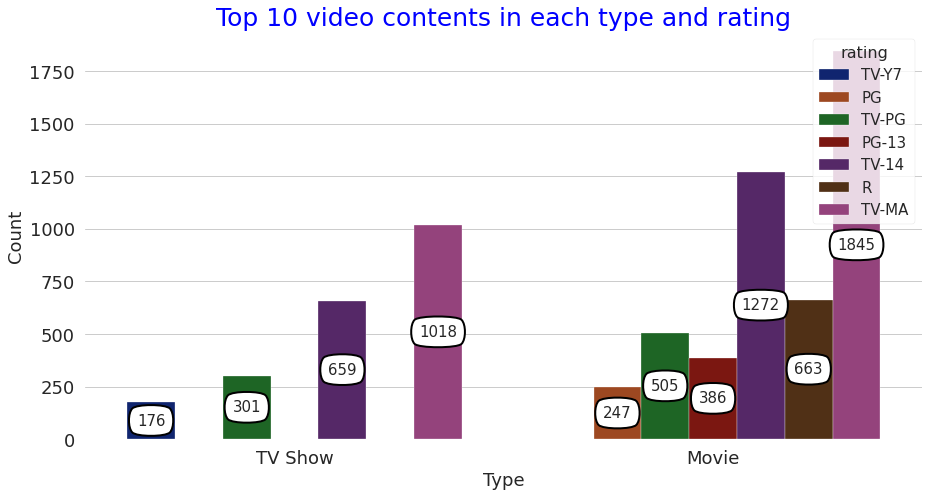

In [ ]:
title = 'Top 10 video contents in each type and rating'
df_type_rating = data.groupby(['type','rating']).count().show_id.reset_index().sort_values(by = 'show_id').tail(10)
fig,ax = plt.subplots(figsize = (15,7.5))
plots = sns.barplot(data = df_type_rating, x='type',y = 'show_id', hue = 'rating', palette='dark')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.title(title, fontsize = 25, color = 'blue')
_ = plt.xlabel('Type')
_ = plt.ylabel('Count')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<h5>Top 10 video contents by its type and rating is listed here. We can say that TV rating video contents are more prevalent in Netflix and R rated videos are all movie contents</h5>

<b>Movies Rating</b>

* The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.
* Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
* Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

<b>TV Show Ratings</b>

* Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.
* Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.
* TV Shows has least amount of counts with 'R' ratings.

What are the types of content? How many content has been produced in which types?

In [ ]:
def get_categories(data):
    categories = {}
    for listed_in in data['genres']:
        for category in listed_in:
            category = category.lower().strip()
            if category in categories: # increase current category count
                categories[category] = categories[category] + 1
            else: # create new category in categories object
                categories[category] = 1
    return pd.DataFrame(categories.values(), index= categories.keys())

categories = get_categories(data).reset_index()
categories.columns = ["category", "count"]

In [ ]:
sorted_category=  categories.sort_values(by="count")
trace = go.Bar(x=sorted_category['count'], y=sorted_category['category'], orientation="h", 
               marker_color='MediumPurple')
layout = go.Layout(title="Countries with most content", height=700, 
                   legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure([trace], layout=layout)
fig.show()

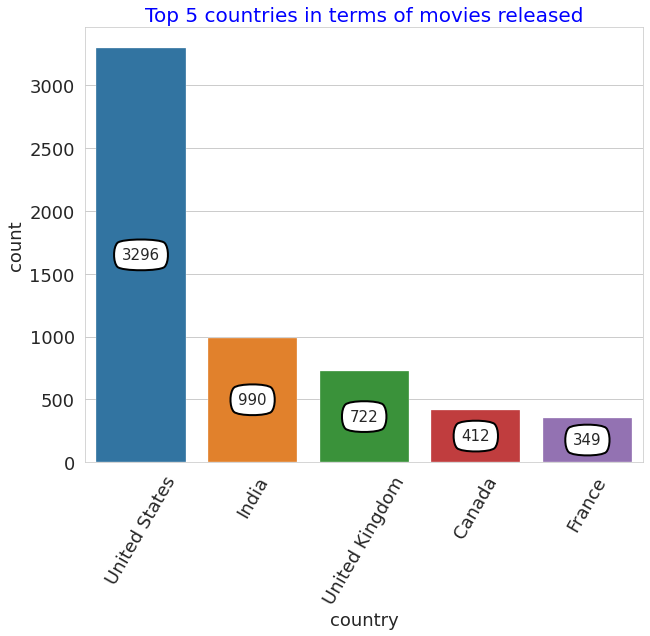

In [ ]:
title = 'Top 5 countries in terms of movies released'
countries = {}
for country in data.country.dropna():
    for sub_country in str(country).split(', '):
        if sub_country not in countries:
            countries[sub_country] = 1
        else: countries[sub_country] += 1
df_countries = pd.DataFrame(list(countries.items()),columns = ['country','count']).sort_values(by = ['count'])
_ = plt.subplots(figsize = (10,8))
_ = plt.xticks(rotation = 60)
_ = plt.title(title, color='blue', fontsize=20)
plots = sns.barplot(data = df_countries.tail()[::-1],x= 'country', y='count')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

United states tops the productivity count with a huge margin nearly thrice the movie contents presented from the second best India.

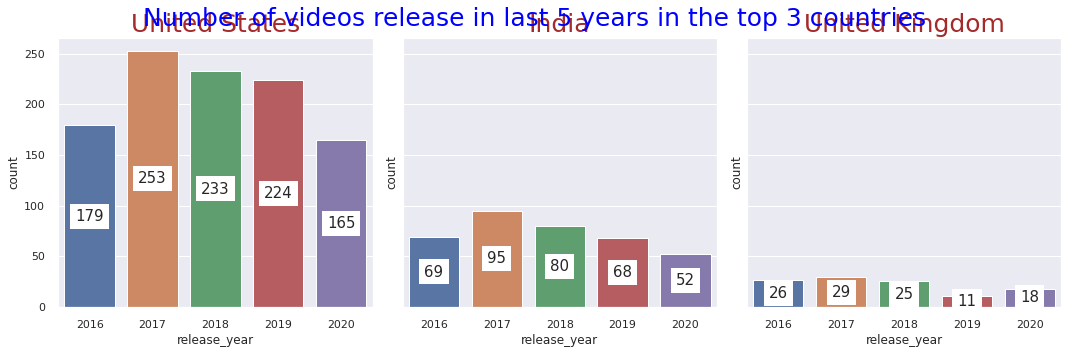

In [79]:


fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5),sharey=True)
_ = fig.suptitle(title, fontsize = 25, color = 'blue')
i = 0
for country in df_countries.tail(3).country.values[::-1]:
    df_country = data.loc[data.country == country].loc[(data.release_year>2015) & (data.release_year<=2020)]
    plots = sns.countplot(data = df_country,x= 'release_year', ax = ax[i])
    _ = ax[i].set_title(country,color='brown', fontsize=25)
    for bar in plots.patches:
        _ = plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()/2), ha='center', va='center',
                       size=15, xytext=(0, 0),bbox=dict(fc="w", ec="white", lw=2),
                       textcoords='offset points')
    i += 1
fig.tight_layout()
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

The number of video uploads per year remains steady for past 4 years in all the top 3 countries except the considerable increase during the year 2017

What is the number of content added to Netflix by years? I want to examine TV Show and Movie types separately.

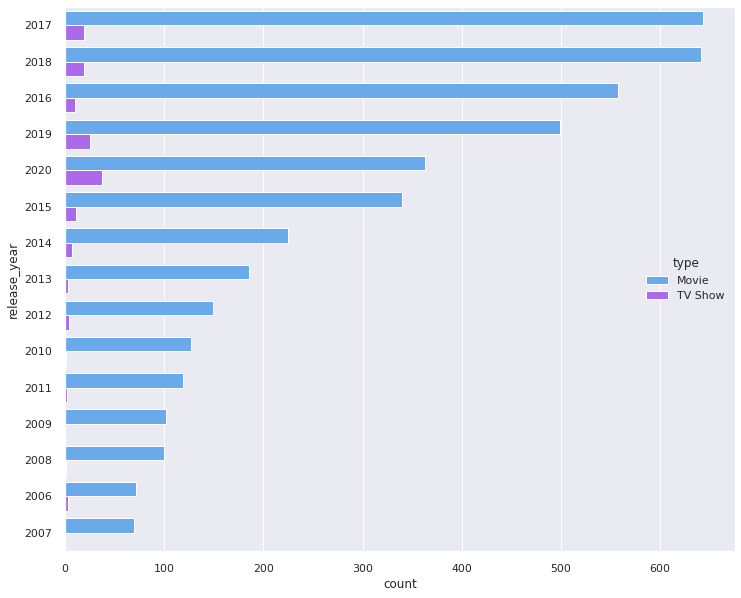

In [76]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data= data, palette="cool", order= data['release_year'].value_counts().index[0:15],hue=data['type'])

* We can see that Netflix released most number of content in year 2017.
* Noticeable growth in releasing content can be seen from the year 2015.

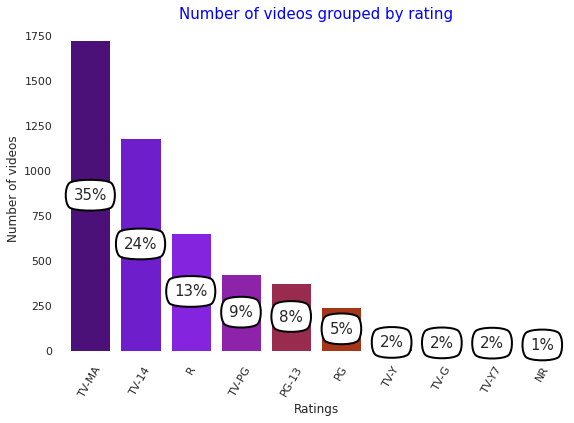

In [80]:
rating = data['rating'].value_counts()
#rating = rating.sort_values()

title = 'Number of videos grouped by rating'
_ = plt.figure(figsize=(9,6));
_ = plt.title(title, color='blue', fontsize=15)
plots = sns.barplot(y=rating.values[:10], x=rating.index[:10], palette='gnuplot',orient='v');
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height()/rating.sum()*100, '.0f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.xlabel('Ratings')
_ = plt.xticks(rotation = 60)
_ = plt.ylabel('Number of videos')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)
